In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## problem1

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   1.,
          0.,   1.,   0.,   0.,   2.,   5.,   7.,   7.,  14.,  13.,  22.,
         32.,  32.,  47.,  62.,  64.,  84.,  94., 139., 157., 162., 198.,
        213., 265., 246., 254., 299., 327., 304., 298., 286., 281., 276.,
        258., 217., 252., 207., 190., 171., 130., 134.,  99.,  80.,  69.,
         76.,  62.,  43.,  51.,  44.,  37.,  34.,  39.,  35.,  33.,  30.,
         28.,  32.,  36.,  19.,  34.,  40.,  42.,  38.,  45.,  36.,  49.,
         37.,  40.,  51.,  45.,  46.,  41.,  32.,  38.,  31.,  29.,  30.,
         42.,  34.,  34.,  38.,  33.,  31.,  28.,  27.,  23.,  36.,  30.,
         23.,  20.,  28.,  16.,  14.,  18.,  13.,  18.,  22.,  11.,  15.,
         10.,   9.,  11.,  12.,  11.,   6.,   6.,   7.,  10.,   5.,   6.,
          3.,   6.,   7.,   5.,   1.,   6.,   3.,   2.,   2.,   3.,   1.,
          1.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   1., 

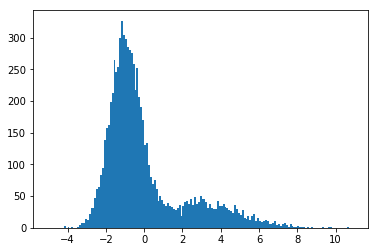

In [528]:
control = np.random.binomial(n=1,p=0.25,size=8000)
g1 = np.random.normal(loc=3,scale=2,size=8000)
g2 = np.random.normal(loc=-1,scale=0.8,size=8000)
data = control * g1 + (1-control) *g2
plt.hist(data, bins=np.arange(-5,11,0.1))

## problem2

In [529]:
from scipy.stats import norm
def density(data,miu,sigma):
    n = len(miu)
    l = len(data)
    density = norm.pdf(data,miu[0],sigma[0]**0.5).reshape([1,l])
    for i in range(1,n):
        density = np.append(density, norm.pdf(data,miu[i],sigma[i]**0.5).reshape([1,l]), axis = 0)
    return density
#data is N size array, miu,sigma,alpha is M size array
def iteration(miu, sigma, alpha, data):
    M = len(miu)
    N = len(data)
    Px = density(data,miu,sigma)
    alpha_Px = Px * alpha.reshape([M,1])
    Pl = alpha_Px / alpha_Px.sum(axis = 0)
    Pl_sum = Pl.sum(axis = 1)
    miu1 = (Pl * data.reshape([1,N])).sum(axis = 1) / Pl_sum
    sigma1 = ( Pl * np.power( (data.reshape([1,N]) - miu1.reshape([M,1])), 2 ) ).sum(axis = 1) /  Pl_sum
    alpha1 = Pl_sum/N
    likelihood = np.log(alpha_Px.sum())
    return miu1, sigma1, alpha1, likelihood

In [530]:
miu = np.array([10,-10])
sigma = np.array([5,5])
alpha = np.array([0.5,0.5])
likelihood = []
for i in range(100):
    miu,sigma,alpha, l = iteration(miu,sigma,alpha,data)
    likelihood.append(l)
    print(miu)
    print(sigma)
    print(alpha)

[ 2.30415574 -1.16134347]
[4.42441781 0.48581023]
[0.33770865 0.66229135]
[ 2.29989032 -1.07624062]
[5.15523198 0.52871537]
[0.32144079 0.67855921]
[ 2.33802798 -1.04229491]
[5.37613516 0.55379017]
[0.31100002 0.68899998]
[ 2.38938908 -1.02794054]
[5.39546949 0.56930148]
[0.30343169 0.69656831]
[ 2.44168825 -1.02121336]
[5.34010444 0.57962598]
[0.29749587 0.70250413]
[ 2.49045998 -1.01751201]
[5.26106433 0.58710047]
[0.29261853 0.70738147]
[ 2.5344771  -1.01506814]
[5.17813892 0.59293256]
[0.28850279 0.71149721]
[ 2.5737384  -1.01319551]
[5.09864432 0.59773455]
[0.28497349 0.71502651]
[ 2.6086465  -1.01162224]
[5.02499494 0.60182426]
[0.28191493 0.71808507]
[ 2.63969362 -1.01023628]
[4.95770837 0.60537814]
[0.27924423 0.72075577]
[ 2.66735163 -1.00898803]
[4.89659208 0.60850396]
[0.27689868 0.72310132]
[ 2.69204002 -1.00785266]
[4.84121069 0.61127437]
[0.27482912 0.72517088]
[ 2.71412199 -1.00681552]
[4.79106835 0.61374255]
[0.27299601 0.72700399]
[ 2.73390941 -1.00586643]
[4.74567798 

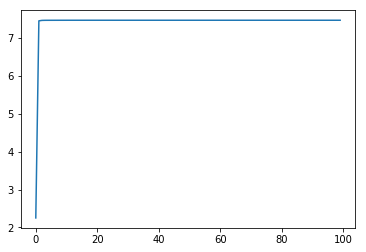

In [531]:
plt.plot(likelihood)

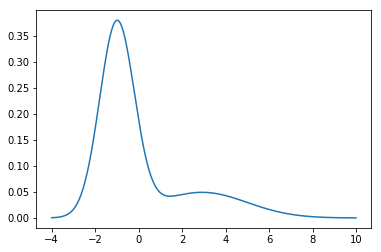

In [532]:
x = np.linspace(-4,10,2000)
y = (density(x,miu,sigma) * alpha.reshape([2,1])).sum(axis = 0)
plt.plot(x,y)

## problem3

In [283]:
def phi(data):
    return np.abs(data)<0.5

def KDE(data,h):
    n = len(data)
    x = np.linspace(-4,10,500)
    x_pile = x.reshape([1,500]).repeat([n],axis = 0)
    p = phi( (data.reshape([n,1]) - x_pile)/h ).sum(axis =0)/(n*h)
    plt.plot(x,p)

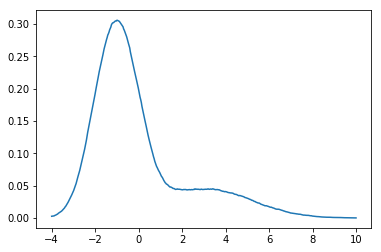

In [286]:
KDE(data,2)

## problem4

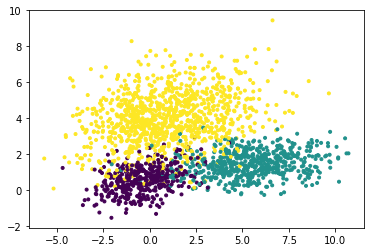

In [2]:
N = 2000
M = 3

miu = np.array([[-0.5,0.5],[5.5,1.5],[1,4]])
cov = np.array([[[2.0,0.3],[0.3,0.5]],[[4.0,0.3],[0.3,0.5]],[[6.0,1.0],[1.0,2.0]]])
alpha = np.array([0.2,0.3,0.5])
X,Y = np.random.multivariate_normal(miu[0],cov[0],size = N).T
X = X.reshape([1,N])
Y = Y.reshape([1,N])
for i in range(1,M):
    x,y = np.random.multivariate_normal(miu[i],cov[i],size = N).T
    X = np.append(X,x.reshape([1,N]),axis =0)
    Y = np.append(Y,y.reshape([1,N]),axis =0)
select = np.random.multinomial(1, alpha, size=N).T
X = (select * X).sum(axis = 0)
Y = (select * Y).sum(axis = 0)
color = (select * np.array([1,2,3]).reshape([M,1])).sum(axis = 0)
plt.scatter(X,Y,c=color,marker='.')

## problem5

In [3]:
from scipy.stats import multivariate_normal

#data should be N * dimension
#miu should be M * dimension
#cov should be M * dimension * dimension
# density return M * N array
def density(data,miu,cov):
    M,d = miu.shape
    N,d = data.shape
    density = multivariate_normal(miu[0,:], cov[0,:,:]).pdf(data).reshape([1,N])
    for i in range(1,M):
        density = np.append(density, multivariate_normal(miu[i,:], cov[i,:]).pdf(data).reshape([1,N]), axis = 0)
    return density

def iteration(miu, sigma, alpha, data):
    M,d = miu.shape
    N,d = data.shape
    #step1
    Px = density(data,miu,sigma) #M*N
    alpha_Px = Px * alpha.reshape([M,1])
    Pl = alpha_Px / alpha_Px.sum(axis = 0)
    Pl_sum = Pl.sum(axis = 1) #
    alpha1 = Pl_sum/N
    #step2
    Pl = Pl.reshape([M,N,1]) # M*N*1 
    data = data.reshape([1,N,d]).repeat([M],axis = 0) # 保持axis = 0的面不动进行复制, 1*N*d 变成 M*N*d
    miu1 = ( Pl * data ).sum(axis = 1) / Pl_sum.reshape([M,1])     # "/" 左边为M*d,右边为M*1  返回M*d
    #step3
    data_c = (data - miu1.reshape([M,1,d])).reshape([M,N,d,1]) #为中心化后的data  M*N*d*1
    data_c_t = np.transpose(data_c, (0,1,3,2)) #data_c转置 M*N*1*d
    sigma1 = (Pl.reshape([M,N,1,1]) * np.matmul(data_c, data_c_t)).sum(axis = 1) /  Pl_sum.reshape([M,1,1])
    
    likelihood = np.log(alpha_Px.sum())
    return miu1, sigma1, alpha1, likelihood

In [10]:
data = np.array([X,Y]).T

In [11]:
miu = np.array([[0.,0.],[5.,5.],[1.,5.]])
cov = np.array([[[1.,0.],[0.,1.]],[[2.,0.],[0.,1.]],[[1.,0.],[0.,2.]]])
alpha = np.array([0.3,0.3,0.4])
likelihood = []
for i in range(100):
    miu,cov,alpha, l = iteration(miu,cov,alpha,data)
    likelihood.append(l)
    #print("miu:",miu)
    #print("sigma:",sigma)
    #print("alpha:",alpha)

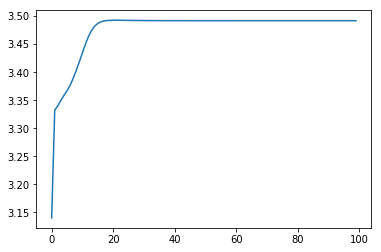

In [8]:
plt.plot(np.arange(100),likelihood)

In [9]:
print("miu:",miu)
print("cov:",cov)
print("alpha:",alpha)

miu: [[-0.52523202  0.48701681]
 [ 5.39318065  1.42597061]
 [ 1.00948269  3.9917433 ]]
cov: [[[1.56720489 0.26661864]
  [0.26661864 0.49218996]]

 [[4.13526996 0.30916592]
  [0.30916592 0.47097095]]

 [[5.8275018  0.8515816 ]
  [0.8515816  2.02910727]]]
alpha: [0.19032297 0.30426306 0.50541397]
